In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [2]:
cond = df['Species'].isin(['Bream', 'Smelt']) # 두가지 조건을 한번에
lw_df = df.loc[cond, ['Length2', 'Weight']] 
fish_data = lw_df.values.tolist()
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [3]:
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
kn = KNeighborsClassifier()

In [7]:
train_input = fish_data[ :35]
train_target = fish_target[ :35]

test_input = fish_data[35: ]
test_target = fish_target[35: ]

In [8]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [9]:
kn.score(test_input, test_target)

0.0

In [10]:
import numpy as np

In [12]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [26]:
np.random.seed(42) # 랜덤값 고정하기
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [29]:
input_arr[[1, 3]] # 1번데이터와 3번 데이터가 가져와짐, fancy indexing이라고 부름

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [44]:
train_input = input_arr[index[:35]] # 위에있는 리스트를 가져와서 35번째까지를 생각하기
train_target = target_arr[index[:35]]
# 섞여진 상태의 train_input과 train_target을 만들 수 있음

In [43]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [45]:
import matplotlib.pyplot as plt

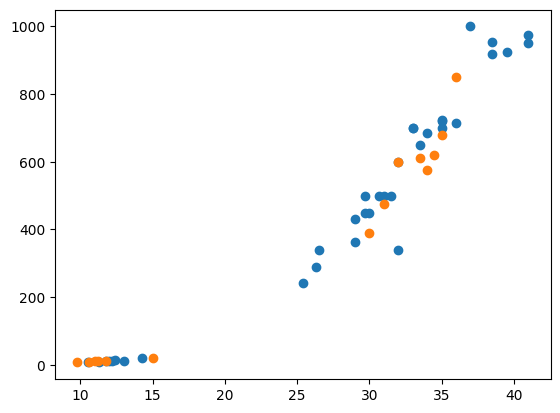

In [46]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [48]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [49]:
kn.score(test_input, test_target)

1.0

In [51]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## iris

In [56]:
import seaborn as sns
iris = sns.load_dataset('iris')

# setosa, versicolor 를 구분하기
# petal_length, petal_width를 기준으로
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [99]:
cond = iris['species'].isin(['setosa', 'versicolor'])

iris_df = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = iris_df.values.tolist()
iris_data

[[1.4, 0.2],
 [1.4, 0.2],
 [1.3, 0.2],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.7, 0.4],
 [1.4, 0.3],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.5, 0.1],
 [1.5, 0.2],
 [1.6, 0.2],
 [1.4, 0.1],
 [1.1, 0.1],
 [1.2, 0.2],
 [1.5, 0.4],
 [1.3, 0.4],
 [1.4, 0.3],
 [1.7, 0.3],
 [1.5, 0.3],
 [1.7, 0.2],
 [1.5, 0.4],
 [1.0, 0.2],
 [1.7, 0.5],
 [1.9, 0.2],
 [1.6, 0.2],
 [1.6, 0.4],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.6, 0.2],
 [1.6, 0.2],
 [1.5, 0.4],
 [1.5, 0.1],
 [1.4, 0.2],
 [1.5, 0.2],
 [1.2, 0.2],
 [1.3, 0.2],
 [1.4, 0.1],
 [1.3, 0.2],
 [1.5, 0.2],
 [1.3, 0.3],
 [1.3, 0.3],
 [1.3, 0.2],
 [1.6, 0.6],
 [1.9, 0.4],
 [1.4, 0.3],
 [1.6, 0.2],
 [1.4, 0.2],
 [1.5, 0.2],
 [1.4, 0.2],
 [4.7, 1.4],
 [4.5, 1.5],
 [4.9, 1.5],
 [4.0, 1.3],
 [4.6, 1.5],
 [4.5, 1.3],
 [4.7, 1.6],
 [3.3, 1.0],
 [4.6, 1.3],
 [3.9, 1.4],
 [3.5, 1.0],
 [4.2, 1.5],
 [4.0, 1.0],
 [4.7, 1.4],
 [3.6, 1.3],
 [4.4, 1.4],
 [4.5, 1.5],
 [4.1, 1.0],
 [4.5, 1.5],
 [3.9, 1.1],
 [4.8, 1.8],
 [4.0, 1.3],
 [4.9, 1.5],
 [4.7, 1.2],
 [4.3, 1.3],
 [4.4, 1.4],
 [4.8, 1.4],

In [126]:
# seosta_df = iris.loc[iris['species'] == 'seosta']

# seosta_length = seosta_df['petal_length'].tolist()
# seosta_width = seosta_df['petal_width'].tolist()

In [127]:
# versicolor_df = iris.loc[iris['species'] == 'versicolor']

# versicolor_length = versicolor_df['petal_length'].tolist()
# versicolor_width = versicolor_df['petal_width'].tolist()

In [128]:
# length = seosta_length + versicolor_length
 
# width = seosta_width + versicolor_width

In [129]:
# iris_data = [ [l, w] for l, w in zip(length, width) ]

In [111]:
iris_target = [1] * len()  + [0] * len(versicolor_width)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [114]:
KNeighborsClassifier(n_neighbors = 100)

KNeighborsClassifier(n_neighbors=100)

In [118]:
kn100 = KNeighborsClassifier(n_neighbors = 100)

In [93]:
train_input = iris_data[ :60]
train_target = iris_target[ :60]

test_input = iris_data[60: ]
test_target = iris_target[60: ]

In [94]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [97]:
kn.score(test_input, test_target)

0.0

In [120]:
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)


# iris
- 정답버전

In [124]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [130]:
cond = iris['species'].isin(['setosa', 'versicolor']) # 종에서 두가지 종 가져오기

iris_df = iris.loc[cond, ['petal_length', 'petal_width']] # 두가지 종에서 필요한 두가지 정보 가져오기
iris_data = iris_df.values # values로 리스트 형태로 출력
iris_data

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [134]:
setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0] # 50개의 줄에 5개의 칼럼 우리가 필요한건 50개 = 버지컬러의 전체 개수


In [152]:
import numpy as np
iris_target =  np.array ([1] * setosa_count + [0] * versicolor_count)  # 1은 세토사 0은 버지칼라

In [154]:

list(range(setosa_count + versicolor_count)) # 세토사와 버지칼라의 총 합 그럼 0번부터 99번까지가 나옴

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [155]:
import random
index = list(range(setosa_count + versicolor_count))
random.shuffle(index)
# 리스트를 섞기 > 왜냐면 섞어야지 버지칼라와 세투사가 섞여서

In [161]:
train_input = iris_data[index[:70]] # 훈련을 70번까지 하기 (보통 8 : 2로 많이 함)
train_target = iris_target[index[:70]]

test_input = iris_data[index[70:]] # 테스트를 70번 이후부터
test_target = iris_target[index[70:]]

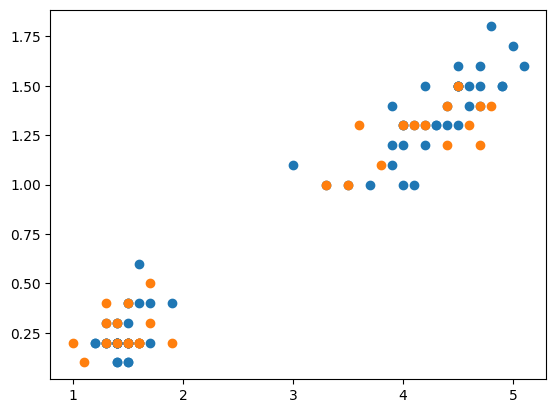

In [162]:
plt.scatter(train_input[:, 0], train_input[:, 1]) 
# [:, 0], [:, 1]을 쓰는 이유는 2D 공간에 점을 찍기 위해 첫 번째와 두 번째 특성을 x, y축으로 사용하기 때문!
plt.scatter(test_input[:, 0], test_input[:, 1])

In [157]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [163]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [164]:
kn.score(test_input, test_target)

1.0

In [165]:
kn.predict(test_input)

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1])